## Image Classifier 

This project shows how to build an image classifier of your choice based on dataset of images you provide.

Now we will use __PML__ library that encapsulates most of the functions to create and prepare a network.

In [ ]:
#install a required library to use OSC protocol
!pip install https://github.com/attwad/python-osc/archive/master.zip
!pip install matplotlib
!conda install scikit-learn -y

This function, __PML.load_img_dataset_from_folder__, will load image files from specific path. It will return an array of samples with their assigned label, and a list of labels.
<br>An example of dataset folder structure is the following:
<br>__Shoes__
<br>|-__children__
<br>|----|- imgA.jpg
<br>|----|- imgB.jpg
<br>|----| ....
<br>|----|- imgN.jpg
<br>|-__men__
<br>|----|- imgA.jpg
<br>|----|- imgB.jpg
<br>|----| ....
<br>|----|- imgN.jpg
<br>|-__women__
<br>|----|- imgA.jpg
<br>|----|- imgB.jpg
<br>|----| ....
<br>|----|- imgN.jpg

This will generate a dataset for shoes with labels: 
<br>children: 0
<br>men     :1
<br>women :2

In [1]:
import numpy as np
import PML

TARGET_WIDTH=64
TARGET_HEIGHT=64

DatasetPath="datasets/pokemon"
TestPath="test/pokemon"

print("Loading Training Samples...")
samples,labels=PML.load_img_dataset_from_folder(DatasetPath,target_size=(TARGET_WIDTH,TARGET_HEIGHT))

#load test samples
print("Loading Test Samples...")
sample_test,labels_test=PML.load_img_dataset_from_folder(TestPath,target_size=(TARGET_WIDTH,TARGET_HEIGHT))

Loading Training Samples...


/anaconda3/envs/PML/lib/python3.6/site-packages/PIL/Image.py:953: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')
/anaconda3/envs/PML/lib/python3.6/site-packages/PIL/Image.py:2655: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


0- [eevee] with total of 188 samples
1- [pikachu] with total of 148 samples
Loading Test Samples...
0- [eevee] with total of 11 samples
1- [pikachu] with total of 8 samples


Show some random images from the loaded dataset

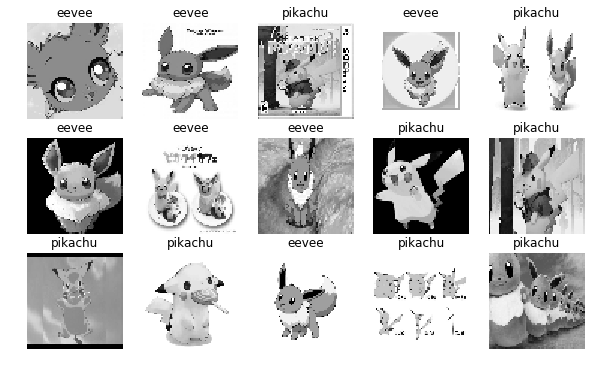

In [3]:

import PML
%matplotlib inline
PML.plot_random_images(samples,labels=labels,rows=3,cols=5)

## Preprocessing

Reshape the loaded samples to a 1D vector so it can be used in the neural network, and normalize image values.

Convert the labels from numbers to one-hot-encoding

In [7]:

from tensorflow.keras import utils
import random

#shuffle samples order
random.shuffle(samples)

#Split to input X and labels Y
X=np.array([i[0] for i in samples])
Y=np.array([i[1] for i in samples])
 
#Convert samples to 1D vectors
X=PML.prepare_flatten_samples(X)
#normalize values
x_dataset,normalizer=PML.normalize_image(X)

#prepare labels to one-hot-encoding
nb_classes=len(labels)
y_dataset = utils.to_categorical(Y, nb_classes)

In [8]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(x_dataset,y_dataset,test_size=0.1)

print("Training using: {0} samples".format(len(X_train)))
print("Validating using: {0} samples".format(len(X_test)))

Training using: 302 samples
Validating using: 34 samples


## Model Creation

Create a model for training

In [20]:

from tensorflow.keras.callbacks import TensorBoard
from time import time

#prepare tensorboard
tensorboard = TensorBoard(log_dir="logs/Images_{}".format(time()))

TrainModel=True #Set to False to load pretrained model

X_train=np.array(X_train)
X_test=np.array(X_test)

Y_train=np.array(Y_train)
Y_test=np.array(Y_test)

model=PML.create_classify_model(X_train.shape[1],nb_classes,16,[16,8],dropout=0)
history=model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=100,batch_size=32, callbacks=[tensorboard])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 16)                65552     
_________________________________________________________________
dense_12 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_13 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_14 (Dense)             (None, 2)                 18        
Total params: 65,978
Trainable params: 65,978
Non-trainable params: 0
_________________________________________________________________
Train on 302 samples, validate on 34 samples
Epoch 1/100
302/302 [==============================] - 0s 768us/step - loss: 0.8561 - acc: 0.4238 - val_loss: 0.6887 - val_acc: 0.5588
Epoch 2/100
302/302 [==============================] - 0s 82us/step - loss: 0.6904 - acc: 

Epoch 55/100
302/302 [==============================] - 0s 90us/step - loss: 0.0088 - acc: 0.9967 - val_loss: 0.0579 - val_acc: 0.9412
Epoch 56/100
302/302 [==============================] - 0s 81us/step - loss: 0.0086 - acc: 0.9967 - val_loss: 0.0608 - val_acc: 0.9706
Epoch 57/100
302/302 [==============================] - 0s 108us/step - loss: 0.0084 - acc: 0.9967 - val_loss: 0.0573 - val_acc: 0.9412
Epoch 58/100
302/302 [==============================] - 0s 90us/step - loss: 0.0082 - acc: 0.9967 - val_loss: 0.0567 - val_acc: 0.9706
Epoch 59/100
302/302 [==============================] - 0s 108us/step - loss: 0.0077 - acc: 0.9967 - val_loss: 0.0584 - val_acc: 0.9706
Epoch 60/100
302/302 [==============================] - 0s 107us/step - loss: 0.0077 - acc: 0.9967 - val_loss: 0.0565 - val_acc: 0.9706
Epoch 61/100
302/302 [==============================] - 0s 100us/step - loss: 0.0074 - acc: 0.9967 - val_loss: 0.0579 - val_acc: 0.9706
Epoch 62/100
302/302 [=============================

In [21]:
from importlib import reload
reload(PML)

PML.export_model(model,"./saved_models/pokemon")

Model exported.


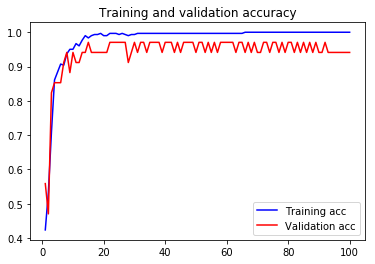

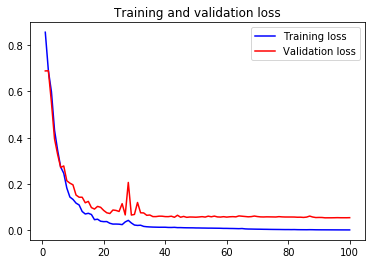

In [22]:
PML.plot_acc_loss(history)

## Test Samples

Load newly unseen samples to test them against the trained model. Check the accuracy of training.

In [23]:
import importlib
importlib.reload(PML)
_=PML.test_samples(model,samples=sample_test,labels=labels,normalizer=normalizer,flatten=True)

Accuracy for [eevee] is 28%
Accuracy for [pikachu] is 75%


## [Optional] OSC for realtime recognition


You can use this to communicate with external application (Processing for example) to predict images

In [ ]:
#setup OSC Protocol to communicate with Processing
import OSCHelper
server=OSCHelper.createServer(9000)
client=OSCHelper.createClient(4200)

In [ ]:
import numpy as np
import io

def onOSC_Image(*args):
    width=args[1]
    height=args[2]
    jpgdata=args[3]
    file_jpgdata = io.BytesIO(jpgdata)
    img = Image.open(file_jpgdata).resize((TARGET_WIDTH,TARGET_HEIGHT)).convert("L")
    img=np.array(img).astype(float)
    img=(img-mean)/std
    x=np.reshape(img,(TARGET_WIDTH*TARGET_HEIGHT))
    res=model.predict(np.array([x]))
    label_idx=np.argmax(res)
    client.send_message("/output/label",[int(label_idx),str(labels[label_idx])])
    #plt.imshow(img,cmap='gray')
    #plt.title("Prediction:{0}".format(labels[label_idx]))
    #plt.show()

server.addMsgHandler( "/inputs/image", onOSC_Image )

OSCHelper.start_server(server)


In [ ]:
server.close()
